### Import libraries

In [27]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from gensim.models import LdaModel,CoherenceModel
from gensim import corpora


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1. Read the .csv file using Pandas, and look at the first few top records

In [30]:
df=pd.read_csv('K8 Reviews v0.2.csv')
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [31]:
df.isna().sum()

sentiment    0
review       0
dtype: int64

In [32]:
df.shape

(14675, 2)

### 2. Normalize the casing of the review text, and extract the text into a list for easier manipulation.

In [33]:
reviews=list(df['review'].str.lower())
reviews

['good but need updates and improvements',
 "worst mobile i have bought ever, battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected, they are making full by saying that battery is 4000mah & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.don't know how lenovo will survive by making full of us.please don;t go for this else you will regret like me.",
 'when i will get my 10% cash back.... its already 15 january..',
 'good',
 'the worst phone everthey have changed the last phone but the problem is still same and the amazon is not returning the phone .highly disappointing of amazon',
 "only i'm telling don't buyi'm totally disappointedpoor batterypoor camerawaste of money",
 'phone is awesome. but while charging, it heats up allot..really a genuine reason to hate lenovo k8 note',
 'the battery level has worn down',
 "it'

In [34]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anees\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### 3. Tokenize the reviews using NLTK's word_tokenize function

In [35]:
review_tokens=[word_tokenize(review) for review in reviews]

### 4. Perform partsof speech tagging on each sentence using the NLTK POS tagger

In [36]:
review_tagg=[pos_tag(tokens) for tokens in review_tokens]

### 5. For the topic model, include nouns only
a. Find all POS tags that correspond to nouns

b. Limit the data to terms with these tags

In [37]:
def filter_nouns(review_tagg):
    noun_tags=['NN','NNS','NNP','NNPS']
    return [word for word,tag in review_tagg if tag in noun_tags]
    
noun_reviews=[filter_nouns(tagged) for tagged in review_tagg]

### 6. Lemmatize
a. The different forms of the terms need to be treated as one

b. For the time being, there is no need to provide a POS tag to the lemmatizer


In [38]:
lemmatizer=nltk.stem.WordNetLemmatizer()

In [39]:
lematized_tokens=[[lemmatizer.lemmatize(word) for word in reviews] for reviews in noun_reviews]

### 7. Remove stopwords and punctuations (if any)

In [40]:
stopwords_eng=set(stopwords.words('english'))
punctuation=set(string.punctuation)

In [41]:
review_clean=[ [word for word in reviews if word not in stopwords_eng and word not in punctuation and len(word)>2]
            for reviews in lematized_tokens]

### 8. Create a topic model using LDA on the cleaned up data with 12 topics
a. Print the top terms for each topic

b. Find the coherence of the model with the c_v metric

In [42]:
## create a dictionary
dictionary=corpora.Dictionary(review_clean)
corpus=[dictionary.doc2bow(text) for text in review_clean]

In [43]:
lda_model12=LdaModel(corpus=corpus,id2word=dictionary,num_topics=12,passes=10,random_state=42)

In [44]:
topics=lda_model12.print_topics()
for topic in topics:
    print(topics)

for i,topic in lda_model12.print_topics(num_topics=10):
    print(f"Topic{i+1}, {topic}")

[(0, '0.112*"camera" + 0.071*"battery" + 0.032*"processor" + 0.031*"mode" + 0.026*"use" + 0.022*"usage" + 0.022*"day" + 0.020*"game" + 0.019*"issue" + 0.019*"ram"'), (1, '0.287*"camera" + 0.206*"quality" + 0.108*"performance" + 0.078*"...." + 0.025*"sound" + 0.018*"picture" + 0.013*"display" + 0.011*"item" + 0.011*"effect" + 0.008*"....."'), (2, '0.093*"issue" + 0.090*"charger" + 0.084*"network" + 0.055*"sim" + 0.043*"handset" + 0.029*"jio" + 0.026*"volta" + 0.026*"month" + 0.024*"turbo" + 0.023*"piece"'), (3, '0.068*"hai" + 0.044*"return" + 0.044*"cast" + 0.038*"star" + 0.037*"option" + 0.028*"policy" + 0.021*"awesome" + 0.021*"screen" + 0.018*"color" + 0.016*"interface"'), (4, '0.274*"battery" + 0.199*"mobile" + 0.057*"backup" + 0.052*"hour" + 0.034*"time" + 0.033*"charge" + 0.024*"issue" + 0.023*"drain" + 0.023*"charging" + 0.022*"day"'), (5, '0.109*"speaker" + 0.102*"life" + 0.076*"battery" + 0.063*"....." + 0.035*"work" + 0.033*"touch" + 0.029*"mark" + 0.021*"function" + 0.020*"fa

In [45]:
# Coherence of the model
cohernce_ldamodel12=CoherenceModel(model=lda_model12,dictionary=dictionary,texts=review_clean,coherence='c_v')
coherence_score12=cohernce_ldamodel12.get_coherence()
print(f" Coherence score for 12 topics:  {coherence_score12}")

 Coherence score for 12 topics:  0.505512076453024


### 9. Analyze the topics through the business lens

a. Determine which of the topics can be combined

In [46]:
topics = lda_model12.print_topics(num_words=10)

# Display keywords in a cleaner format
for idx, topic in topics:
    print(f"\nTopic {idx}:")
    keywords = [word.split('*')[1].strip().strip('"') for word in topic.split('+')]
    print(", ".join(keywords))


Topic 0:
camera, battery, processor, mode, use, usage, day, game, issue, ram

Topic 1:
camera, quality, performance, ...., sound, picture, display, item, effect, .....

Topic 2:
issue, charger, network, sim, handset, jio, volta, month, turbo, piece

Topic 3:
hai, return, cast, star, option, policy, awesome, screen, color, interface

Topic 4:
battery, mobile, backup, hour, time, charge, issue, drain, charging, day

Topic 5:
speaker, life, battery, ....., work, touch, mark, function, fast, cell

Topic 6:
money, heat, waste, value, set, cam, earphone, need, hand, get

Topic 7:
phone, note, lenovo, call, feature, time, issue, screen, music, option

Topic 8:
problem, heating, issue, device, day, update, software, network, ...., superb

Topic 9:
everything, screen, glass, display, box, headphone, gorilla, bill, headset, plz

Topic 10:
product, service, amazon, delivery, replacement, center, lenovo, day, time, purchase

Topic 11:
phone, price, feature, range, camera, budget, month, specifica

In [48]:
merged_topics={
    "Camera,performance & battery":[0,1,4],
    "Price, high value & budget ":[3,11],
    "Heat & Value":[2,6],
    
}



SyntaxError: '{' was never closed (4089032836.py, line 1)

### 10. Create a topic model using LDA with what you think is the optimal number of topics

a. Find the coherence of the model

In [51]:
# Try different topic numbers to find best coherence
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_scores = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append((num_topics, coherence_model.get_coherence()))
    return coherence_scores

scores = compute_coherence_values(dictionary, corpus, review_clean, start=2, limit=20, step=2)

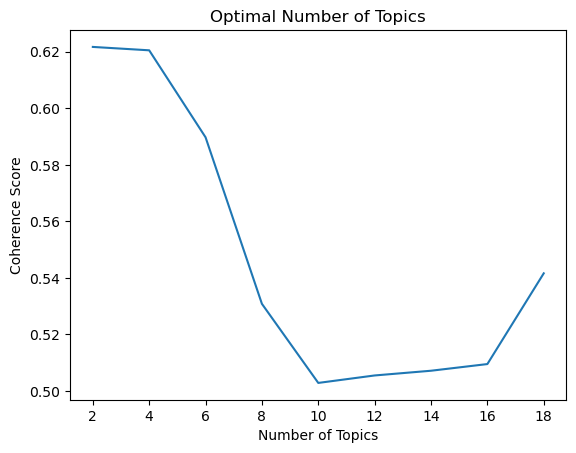

In [52]:
# Plot coherence scores
x, y = zip(*scores)
plt.plot(x, y)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

In [53]:
optimal_topics=4
lda_model=LdaModel(corpus=corpus,id2word=dictionary,passes=10,num_topics=optimal_topics,random_state=42)
coherence_score=CoherenceModel(dictionary=dictionary, model=lda_model,texts=review_clean,coherence='c_v').get_coherence()
print(f"Final coherence score: {coherence_score}")

Final coherence score: 0.6204850254792951


### 11. Businesses should be able to interpret the topics.

a. Name each of the identified topics

b. Create a table with the topic names and the top ten terms in each to present to the business

In [61]:
topics_table={}
for idx,topic in lda_model.print_topics(num_topics=10):
    topic_words=topic.split('+')
    words=[word.split('*')[1].strip().strip(' " ') for word in topic_words]
    topics_table[f'Topic{idx+1}']=words

topics_df=pd.DataFrame(topics_table).T
topics_df.columns=[f"Top_term{i+1}" for i in range(10)]
topics_df.reset_index(inplace=True)
topics_df.rename(columns={'index':'Topic Name'},inplace=True)

topics_df

,Topic Name,Top_term1,Top_term2,Top_term3,Top_term4,Top_term5,Top_term6,Top_term7,Top_term8,Top_term9,Top_term10
0,Topic1,phone,battery,camera,quality,issue,performance,backup,time,day,hour
1,Topic2,product,problem,money,....,waste,heating,.....,delivery,amazon,value
2,Topic3,mobile,price,camera,feature,range,speaker,note,quality,superb,sound
3,Topic4,phone,note,network,lenovo,issue,screen,call,service,day,option
